# init

In [225]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load_diabetes

In [226]:
diabetes=load_diabetes()
diabetes.keys()

diabetesdf = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetesdf

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [227]:
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)
print(type(df_X))
print(type(df_y))

(442, 10)
(442,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [228]:
X_train, X_test, y_train, y_test= train_test_split(df_X, 
                                                   df_y, 
                                                   test_size=0.2, 
                                                   random_state = 67)

## def model

In [229]:
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.51776908 0.92409618 0.13929872 0.50439642 0.93002382 0.50713667
 0.96803373 0.36870611 0.95728549 0.23262391]
0.26357775677162043


In [230]:
def model(X,W,b) : 
    predictions = 0
    for i in range(10):
        predictions += X[:,i] * W[i]
    predictions += b
    return predictions

a = model(df_X, W, b)
print(len(a))
print(a.shape)

442
(442,)


In [231]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

## def Loss

In [232]:
def Loss(X,W,b,y) :
    pred = model(X,W,b)
    L = MSE(y, pred)
    return L

## def gradient

In [233]:
def gradient(X,W,b,y) : 
    N = len(y)
    pred = model(X,W,b)
    
    dW = 1/N * 2 * X.T.dot(pred-y)
    db = 2 * (pred-y).mean()
    return dW, db

In [234]:
dw, db = gradient(df_X, W,b,df_y)
print(dw)
print(db)

[-1.36934369 -0.31002217 -4.2906763  -3.2265915  -1.54174803 -1.26535193
  2.89055921 -3.14525682 -4.135978   -2.79459982]
-303.7398128122486


## tuning

In [235]:
Learning_rate = 0.1

In [239]:
losses = []
for i in range(1,1001) : 
    dw, db = gradient(X_train,W,b,y_train)
    W -= dw * Learning_rate
    b -= db * Learning_rate
    loss = Loss(df_X,W,b,df_y)
    losses.append(loss)
    if i % 10 == 0 :
        print("{0}번째 Loss :{1:.4f}".format(i,loss))

10번째 Loss :3383.8008
20번째 Loss :3377.9679
30번째 Loss :3372.2351
40번째 Loss :3366.5998
50번째 Loss :3361.0595
60번째 Loss :3355.6117
70번째 Loss :3350.2542
80번째 Loss :3344.9847
90번째 Loss :3339.8011
100번째 Loss :3334.7011
110번째 Loss :3329.6828
120번째 Loss :3324.7442
130번째 Loss :3319.8833
140번째 Loss :3315.0983
150번째 Loss :3310.3873
160번째 Loss :3305.7487
170번째 Loss :3301.1807
180번째 Loss :3296.6817
190번째 Loss :3292.2500
200번째 Loss :3287.8843
210번째 Loss :3283.5828
220번째 Loss :3279.3443
230번째 Loss :3275.1672
240번째 Loss :3271.0502
250번째 Loss :3266.9920
260번째 Loss :3262.9913
270번째 Loss :3259.0469
280번째 Loss :3255.1575
290번째 Loss :3251.3219
300번째 Loss :3247.5391
310번째 Loss :3243.8079
320번째 Loss :3240.1272
330번째 Loss :3236.4959
340번째 Loss :3232.9132
350번째 Loss :3229.3779
360번째 Loss :3225.8892
370번째 Loss :3222.4460
380번째 Loss :3219.0476
390번째 Loss :3215.6929
400번째 Loss :3212.3812
410번째 Loss :3209.1117
420번째 Loss :3205.8834
430번째 Loss :3202.6957
440번째 Loss :3199.5477
450번째 Loss :3196.4388
460번째 Loss :3193.36

## test model

In [240]:
print(W,b)

[  38.23532885 -102.6384564   379.32730091  243.16539714    8.58779981
  -30.96418439 -192.87300256  150.58678242  310.81795197  140.49803947] 151.99224541170096


In [241]:
y_pred = model(X_test,W,b)
mse = Loss(X_test,W,b,y_test)
mse

2453.7014213476823

## visualiztion

<function matplotlib.pyplot.show(close=None, block=None)>

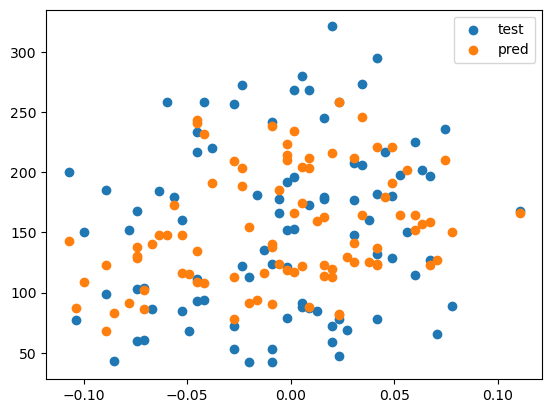

In [242]:
plt.scatter(X_test[:,0], y_test, label='test')
plt.scatter(X_test[:,0], y_pred, label='pred')
plt.legend()
plt.show

# load bike_sharing_demand

In [265]:
csv_path = 'C:/users/juwon/practice_aiffel/bike_sharing_demand/'
train = pd.read_csv(csv_path + 'train.csv')
test = pd.read_csv(csv_path+ 'test.csv')
train['count'].max()

977

In [256]:
datetime = pd.to_datetime(train['datetime'])
train['year'] = datetime.dt.year
train['month'] = datetime.dt.month
train['day'] = datetime.dt.day
train['hour'] = datetime.dt.hour
train['minute'] = datetime.dt.minute
train['second'] = datetime.dt.second
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


## Count date columns

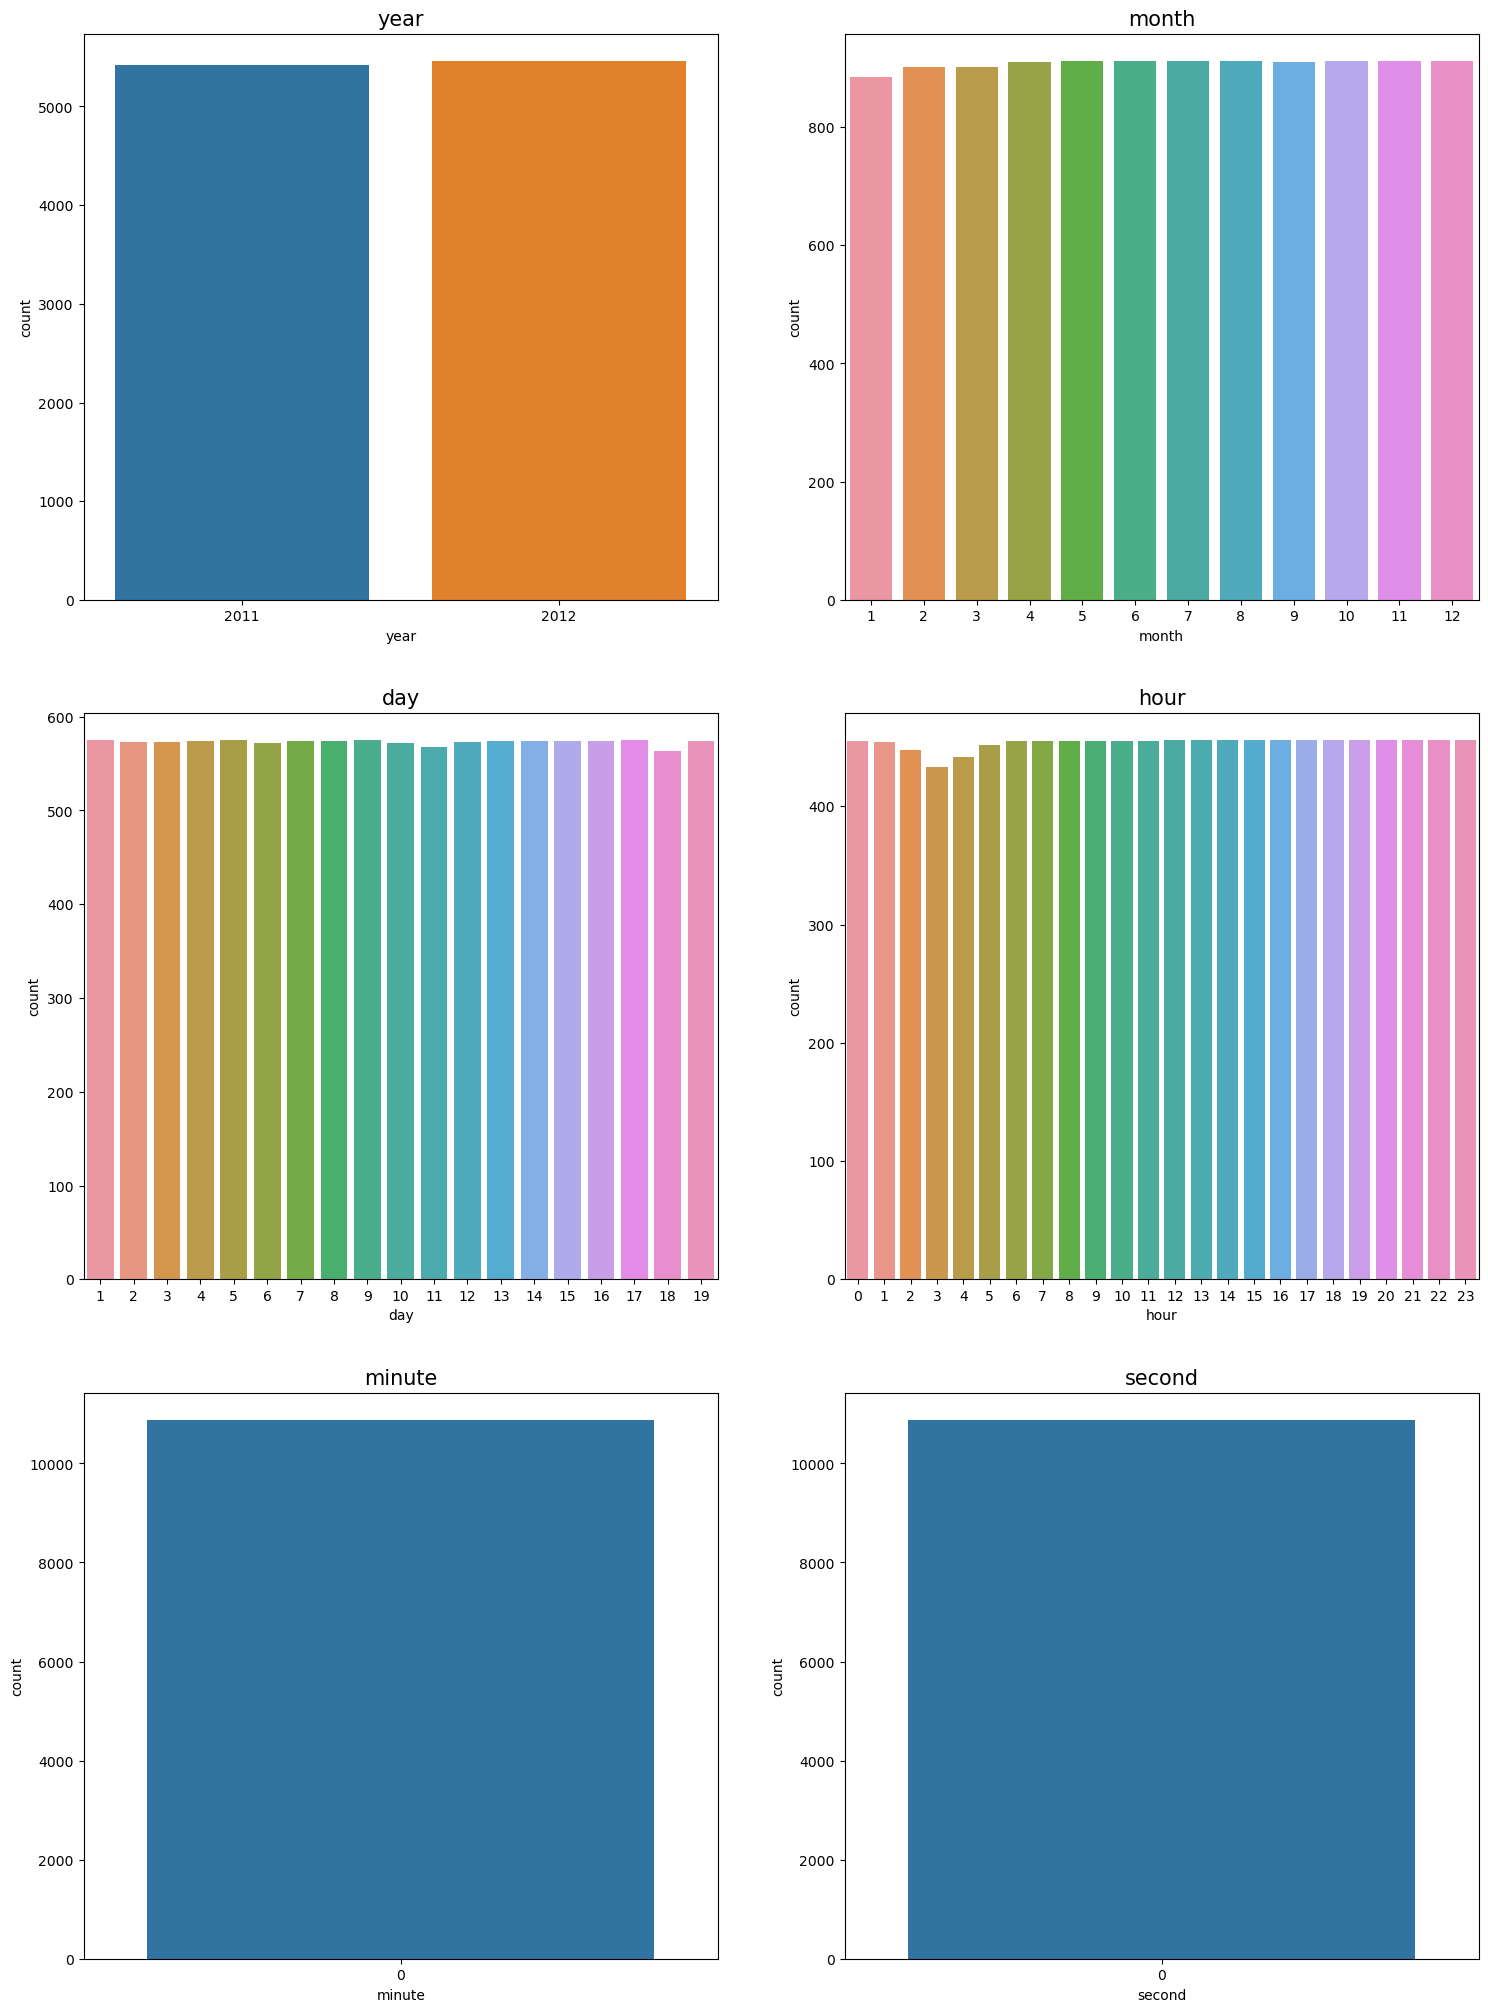

In [257]:
fig, ax = plt.subplots(3, 2, figsize=(18, 25))
date_columns = ['year', 'month', 'day','hour', 'minute', 'second']
count=0
for row in range(3) : 
    for col in range(2) :
        sns.countplot(data = train ,x= date_columns[count],ax =ax[row][col])
        ax[row][col].set_title(date_columns[count],fontsize = 15)
        count +=1

## test model

In [258]:
bicycle_label = train['count'].values
del train['count']
del train['datetime']
del train['casual']
del train['registered']
bicycle_data = train.values
bicycle_data

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 4.,  0.,  1., ..., 21.,  0.,  0.],
       [ 4.,  0.,  1., ..., 22.,  0.,  0.],
       [ 4.,  0.,  1., ..., 23.,  0.,  0.]])

In [259]:
print(bicycle_label.shape)
bicycle_label

(10886,)


array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(bicycle_data,
                                                    bicycle_label,
                                                    test_size=0.2,
                                                    random_state=67)

In [261]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [262]:
bicycle_mse = MSE(y_test, y_pred)
bicycle_rmse = bicycle_mse ** 0.5
print(bicycle_mse, bicycle_rmse)

19030.048898592566 137.94944327032482


## visualization

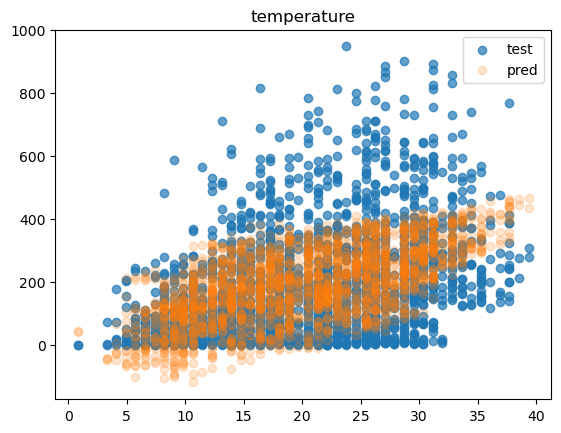

In [271]:
plt.scatter(X_test[:, 4],y_test, label='test',alpha=0.7)
plt.scatter(X_test[:, 4],y_pred, label='pred',alpha=0.2)
plt.legend()
plt.title('temperature')
plt.show()

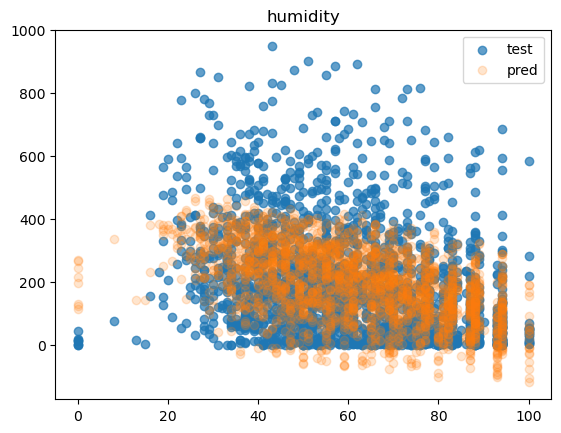

In [270]:
plt.scatter(X_test[:, 6],y_test, label='test',alpha=0.7)
plt.scatter(X_test[:, 6],y_pred, label='pred',alpha=0.2)
plt.legend()
plt.title('humidity')
plt.show()

## 마치며

* load_diabetes는 선형회귀 모델을 직접 설계하였다.learning_rate 그리고 학습횟수로 손실함수 값을 조정했다.  


* learning_rate=0.001로 시작했지만 세 번 이상 모델을 돌려야 loss 값이 3000에 수렴했기에 학습속도가 느리다고 판단하여 0.01, 0.1 순서로 올렸다. 0.1의 경우 한 번의 학습으로 loss값 3000대에 도달했다.


* 모델을 통해 구해진 W,b값으로 예측값 y_pred와 실제값 y_test의 rmse는 더 낮게 나왔다. 예측값과 실값의 분포를 산점도로 시각화 하였다.

* bicycle_demand는 LinearRegression을 사용했다. 파라미터는 수정하지 않았다.


* 연관없는 데이터는 양질의 학습을 위해 학습전에 제거하고 넣어줬다('casual','registered').
datetime 컬럼은 연, 월, 일, 시, 분, 초로 나누어 컬럼을 만들고 제거해주었고, target 값인 'count'를 결과값인 y에 넣어주고 제거했다.


* 예측값과 실값을 산점도로 시각화했다. 온도에 따른 대여량 예측은 0-15 구간은 비슷했지만 15-35 구간에서 대여량이 급증가하는 경향으로 인해 분포의 차이가 나타났다. 습도의 경우도 특정구간에서 대여량이 많았는데 예측값들의 기울기가 낮기 때문에 많은 대여량이 분포하는 습도
구간에서 차이를 보였다.